<a href="https://colab.research.google.com/github/Allison-Lin/BigData/blob/master/1217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
#讀入SportsAnalytics package
library(SportsAnalytics)

`geom_smooth()` using formula 'y ~ x'



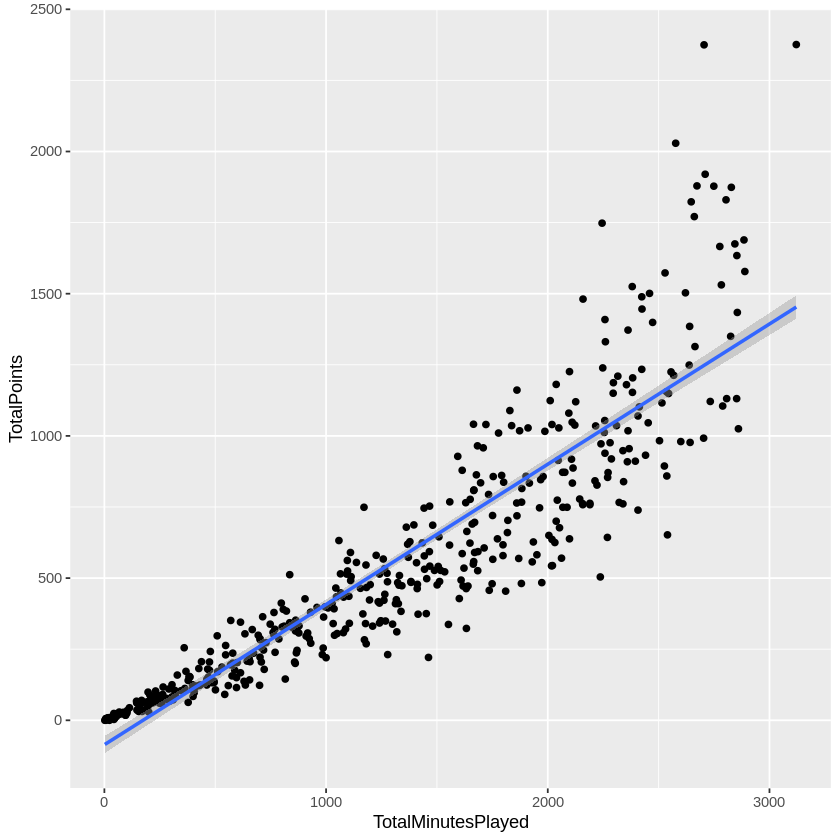

In [8]:
#擷取2015-2016年球季球員資料
NBA1516<-fetch_NBAPlayerStatistics("15-16")

library(ggplot2)
ggplot(NBA1516,aes(x=TotalMinutesPlayed,y=TotalPoints))+
geom_point()+geom_smooth(method = "glm")

In [9]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA1516)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1516)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -85.9071              0.4931  


In [10]:
# e+01: 10^1 / e-04: 10^(-4)
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -1.799e+01           -2.347e-04            1.256e+00  

Degrees of Freedom: 475 Total (i.e. Null);  473 Residual
Null Deviance:	    99360000 
Residual Deviance: 2160000 	AIC: 5367

In [11]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          22.852223            -0.006537             1.275721  
         PositionPF           PositionPG           PositionSF  
         -39.416327           -65.034646           -38.522299  
         PositionSG  
         -52.175144  

Degrees of Freedom: 474 Total (i.e. Null);  468 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    99080000 
Residual Deviance: 1975000 	AIC: 5322

In [13]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [14]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [15]:
# GRE:某考試成績, GPA:在校平均成績, rank:學校聲望
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank,

data = mydata, family = "binomial")

sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [16]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
library(rpart)

In [18]:
DT<-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1516)
DT

n=475 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 475 364 PF (0.15 0.23 0.21 0.18 0.23)  
    2) ThreesMade< 2.5 132  74 C (0.44 0.35 0.098 0.053 0.061)  
      4) Blocks>=4.5 89  37 C (0.58 0.38 0.011 0.011 0.011) *
      5) Blocks< 4.5 43  31 PF (0.14 0.28 0.28 0.14 0.16)  
       10) Steals< 2.5 29  19 PF (0.17 0.34 0.14 0.21 0.14) *
       11) Steals>=2.5 14   6 PG (0.071 0.14 0.57 0 0.21) *
    3) ThreesMade>=2.5 343 242 SG (0.035 0.19 0.25 0.23 0.29)  
      6) Assists>=170.5 96  39 PG (0.031 0.052 0.59 0.15 0.18) *
      7) Assists< 170.5 247 163 SG (0.036 0.24 0.12 0.26 0.34)  
       14) Blocks>=20.5 80  42 PF (0.062 0.48 0 0.26 0.2)  
         28) Steals< 59.5 58  21 PF (0.069 0.64 0 0.14 0.16) *
         29) Steals>=59.5 22   9 SF (0.045 0.045 0 0.59 0.32) *
       15) Blocks< 20.5 167  99 SG (0.024 0.13 0.17 0.26 0.41)  
         30) Assists< 81.5 110  68 SG (0.027 0.18 0.091 0.32 0.38)  
        

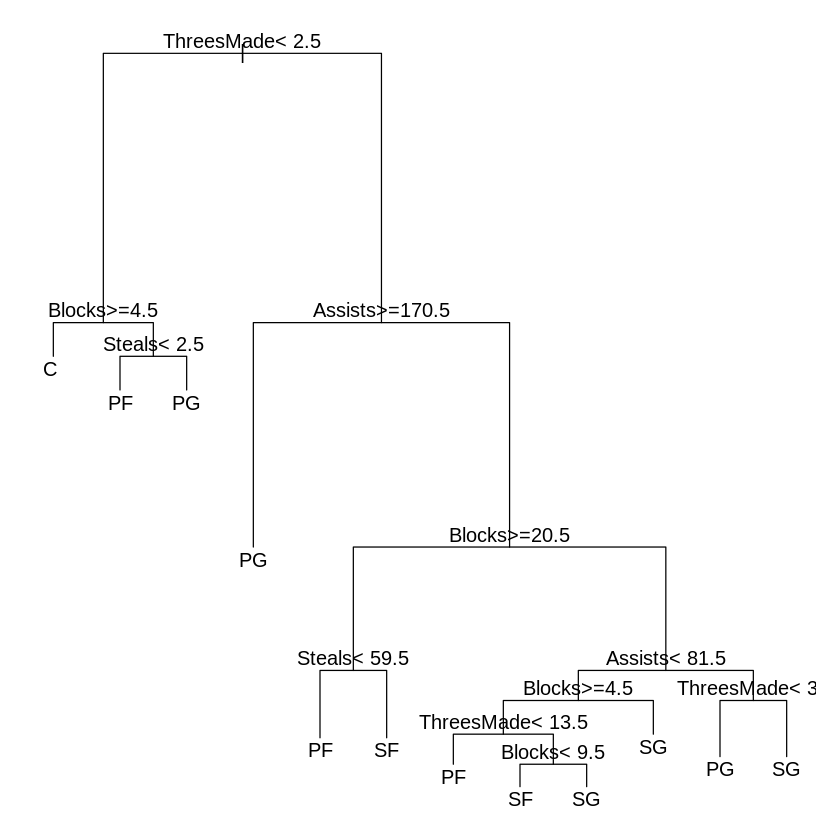

In [20]:
#控球後衛(PG)、得分後衛(SG)、小前鋒(SF)、大前鋒(PF)和中鋒(C)
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

In [21]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
library(rpart.plot)

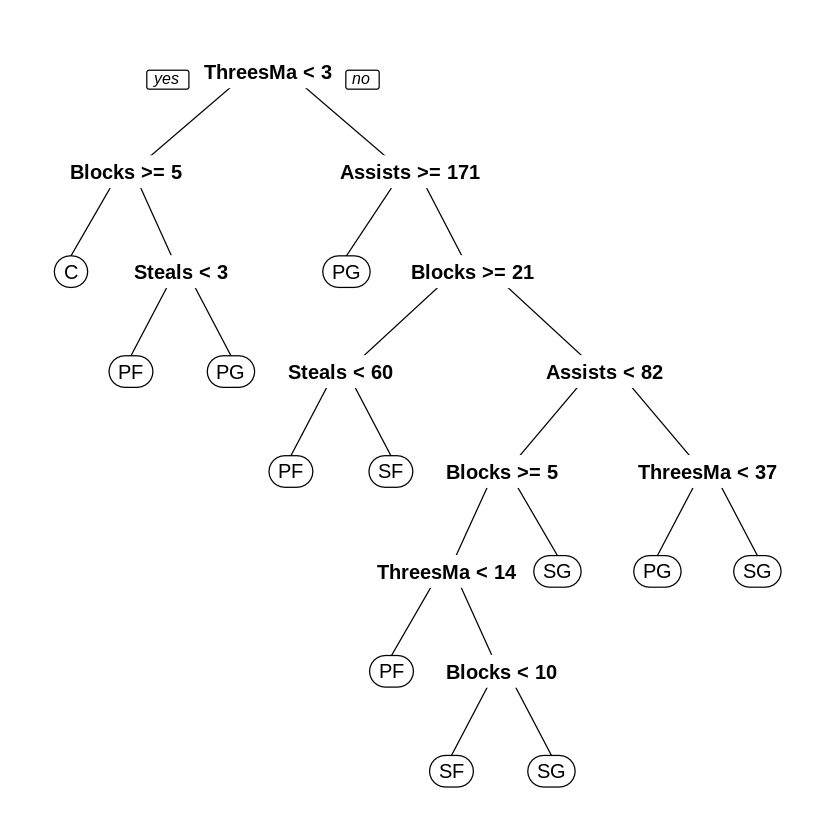

In [25]:
prp(DT)

ERROR: ignored

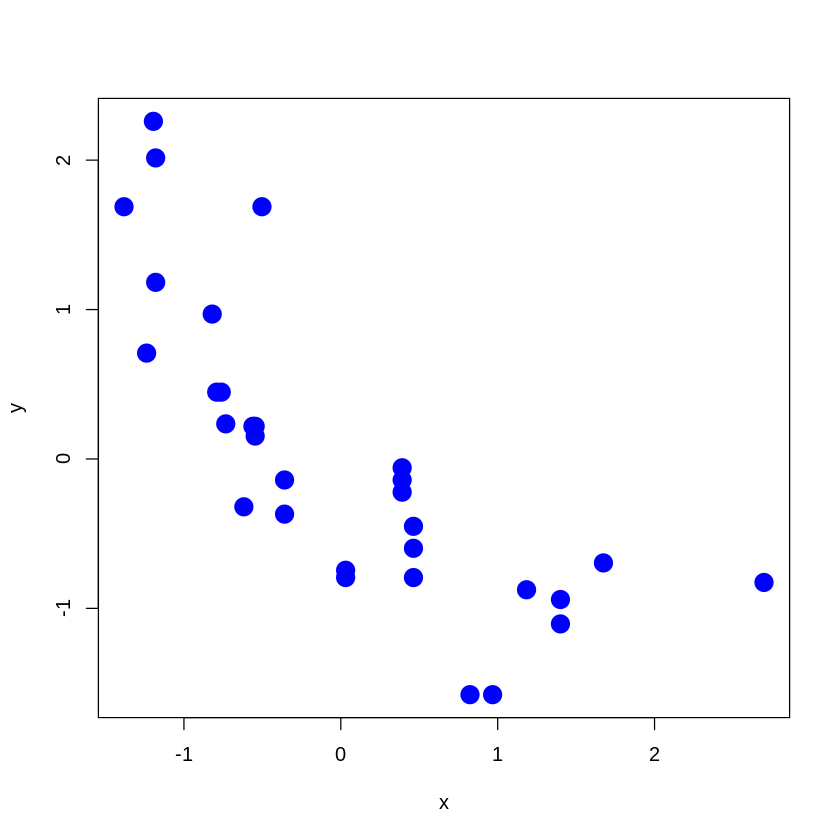

In [26]:
x<-scale(mtcars$hp[-1]);y<-scale(mtcars$mpg[-1])
plot(x,y,col="blue",pch=19,cex=2)
text(x+0.05,y+0.05,labels=labelCar)

In [27]:
dataFrame <- data.frame(x,y)
kmeansObj <- kmeans(dataFrame,centers=3)
names(kmeansObj)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [29]:
kmeansObj$cluster

[1] 2 1 2 2 2 3 1 1 2 2 2 2 2 3 3 3 1 1 1 2 2 2 3 2 1 1 1 3 2 3 2

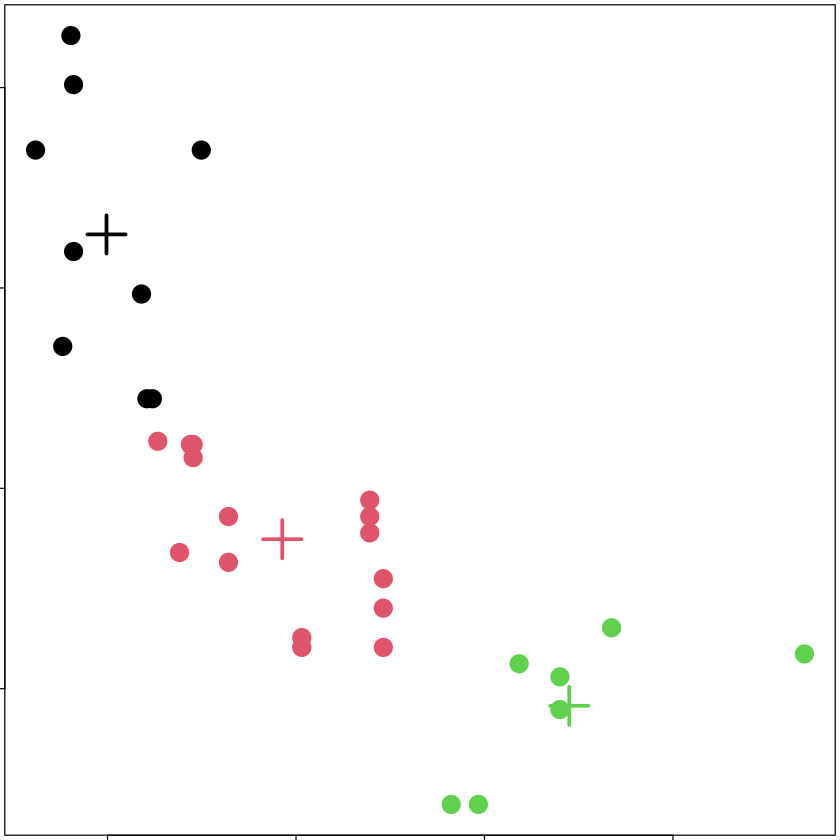

In [30]:
par(mar=rep(0.2,4))
plot(x,y,col=kmeansObj$cluster,pch=19,cex=2)
points(kmeansObj$centers,col=1:3,pch=3,cex=3,lwd=3)

In [32]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [33]:
library(arules)

In [34]:
# Load the libraries
if (!require('arules')){
install.packages("arules");
library(arules) #for Apriori演算法
}
if (!require('datasets')){
install.packages("datasets");
library(datasets) #for Groceries data
}
data(Groceries) # Load the data set
Groceries@data@Dim #169 種商品,9835筆交易資料

[1]  169 9835

In [35]:
# Get the rules
rules <- apriori(Groceries, # data= Groceries

parameter = list(supp = 0.001, conf = 0.8), #參數最低限度
control = list(verbose=F)) #不要顯示output

options(digits=2) # Only 2 digits
inspect(rules[1:5]) # Show the top 5 rules

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [37]:
#排序
rules<-sort(rules, by="confidence", decreasing=TRUE) #按照confidence排序
inspect(rules[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [38]:
#特別針對某項商品(右側變數),像是:買了什麼東⻄的人,會買 牛奶 呢?

rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
appearance = list(default="lhs",rhs="whole milk"), #設定右邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesR[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [40]:
#Regression 迴歸驗證
#讀入SportsAnalytics package
if (!require('SportsAnalytics')){
install.packages("SportsAnalytics")
library(SportsAnalytics)
}
#擷取2018-2019年球季球員資料
NBA1819<-fetch_NBAPlayerStatistics("18-19")
NBA1819<-NBA1819[complete.cases(NBA1819),]

In [41]:
sample(1:10,3) # 從1到10,隨機取三個數字
sample(1:nrow(NBA1516),nrow(NBA1516)/3) #從第一行到最後一行,隨機取1/3行數

[1] 9 8 3

[1]  97 432 229 338  29 212 304 470 253 464 392 103  91  26  74 399  24  12
 [19] 406 166 441 343 473 236 394 106 250  44 301 436 289  17 315  95  93 279
 [37] 217 261 417 388  60 100 355 257 295 173 420 207 383 265 221  27 281 419
 [55] 321  13 452 214  87 466 446 472 222 118 354 184 433 320 429 180 270 248
 [73] 313 376  83 414 465  53 276 127 346 357 224 165 340  71 288 463  38 401
 [91] 442 373 227 361 359  49 120  34  84 125 271 431 104 310 287 457 380  11
[109] 283 264 260 366 426 395 317   5 462  68 337 108 185  69 254 381 231 204
[127] 267 101 384 135 228 405  31  90 136 356 223  94 130 438 232  47 272 152
[145] 115 225 143 255 196 314   8 161  57  76 308 140 408 111

In [43]:
#使用上述方法,選出1/3的元素位置,把NBA的資料分成Training 和 Test set
NBA1819$Test<-F #新增一個參數紀錄分組
#隨機取1/3當Test set
NBA1819[sample(1:nrow(NBA1819),nrow(NBA1819)/3),"Test"]<-T
# Training set : Test set球員數
c(sum(NBA1819$Test==F),sum(NBA1819$Test==T))

[1] 353 176

In [45]:
#用訓練組的資料(NBA1819$Test==F),訓練一個多變數線性迴歸模型
fit<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+
Position+ThreesAttempted+FreeThrowsAttempted,
data =NBA1819[NBA1819$Test==F,])

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.356,6.9014,0.63,5.3e-01
TotalMinutesPlayed,0.012,0.0078,1.56,1.2e-01
FieldGoalsAttempted,0.996,0.0278,35.77,5.8e-118
PositionPF,-8.656,7.9034,-1.10,2.7e-01
PositionPG,-36.978,8.3142,-4.45,1.2e-05
PositionSF,-22.499,7.8591,-2.86,4.5e-03
PositionSG,-25.059,8.5471,-2.93,3.6e-03
ThreesAttempted,0.047,0.0285,1.65,1.0e-01
FreeThrowsAttempted,0.920,0.0428,21.49,1.5e-65


In [53]:
#逐步選擇模型 stepwise 後退學習:一開始先將所有參數加到模型裡,再一個一個拿掉
library(MASS)
##根據AIC,做逐步選擇, 預設倒退學習 direction = "backward"
##trace=FALSE: 不要顯示步驟
finalModel_B<-stepAIC(fit,direction = "backward",trace=FALSE)
summary(finalModel_B)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.356,6.9014,0.63,5.3e-01
TotalMinutesPlayed,0.012,0.0078,1.56,1.2e-01
FieldGoalsAttempted,0.996,0.0278,35.77,5.8e-118
PositionPF,-8.656,7.9034,-1.10,2.7e-01
PositionPG,-36.978,8.3142,-4.45,1.2e-05
PositionSF,-22.499,7.8591,-2.86,4.5e-03
PositionSG,-25.059,8.5471,-2.93,3.6e-03
ThreesAttempted,0.047,0.0285,1.65,1.0e-01
FreeThrowsAttempted,0.920,0.0428,21.49,1.5e-65


In [54]:
#逐步選擇模型 stepwise 往前學習:一開始先做一個沒有參數的模型,再把參數一個一個加進去
##根據AIC,做逐步選擇, 往前學習 direction = "forward"
finalModel_F<-stepAIC(fit,direction = "forward",trace=FALSE)
summary(finalModel_F)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.356,6.9014,0.63,5.3e-01
TotalMinutesPlayed,0.012,0.0078,1.56,1.2e-01
FieldGoalsAttempted,0.996,0.0278,35.77,5.8e-118
PositionPF,-8.656,7.9034,-1.10,2.7e-01
PositionPG,-36.978,8.3142,-4.45,1.2e-05
PositionSF,-22.499,7.8591,-2.86,4.5e-03
PositionSG,-25.059,8.5471,-2.93,3.6e-03
ThreesAttempted,0.047,0.0285,1.65,1.0e-01
FreeThrowsAttempted,0.920,0.0428,21.49,1.5e-65


In [55]:
#逐步選擇模型 stepwise 雙向學習:參數加加減減
##根據AIC,做逐步選擇, 雙向學習 direction = "both"
finalModel_Both<-stepAIC(fit,direction = "both",trace=FALSE)
summary(finalModel_Both)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.356,6.9014,0.63,5.3e-01
TotalMinutesPlayed,0.012,0.0078,1.56,1.2e-01
FieldGoalsAttempted,0.996,0.0278,35.77,5.8e-118
PositionPF,-8.656,7.9034,-1.10,2.7e-01
PositionPG,-36.978,8.3142,-4.45,1.2e-05
PositionSF,-22.499,7.8591,-2.86,4.5e-03
PositionSG,-25.059,8.5471,-2.93,3.6e-03
ThreesAttempted,0.047,0.0285,1.65,1.0e-01
FreeThrowsAttempted,0.920,0.0428,21.49,1.5e-65


In [58]:
#用Test set來評估模型好不好,使用predict函數,將測試組資料放入預測模型中,預測測試組的結果
predictPoint<-predict(finalModel_Both, #Test==T, test data
newdata = NBA1819[NBA1819$Test==T,])

cor(x=predictPoint,y=NBA1819[NBA1819$Test==T,]$TotalPoints) #相關係數

[1] 1

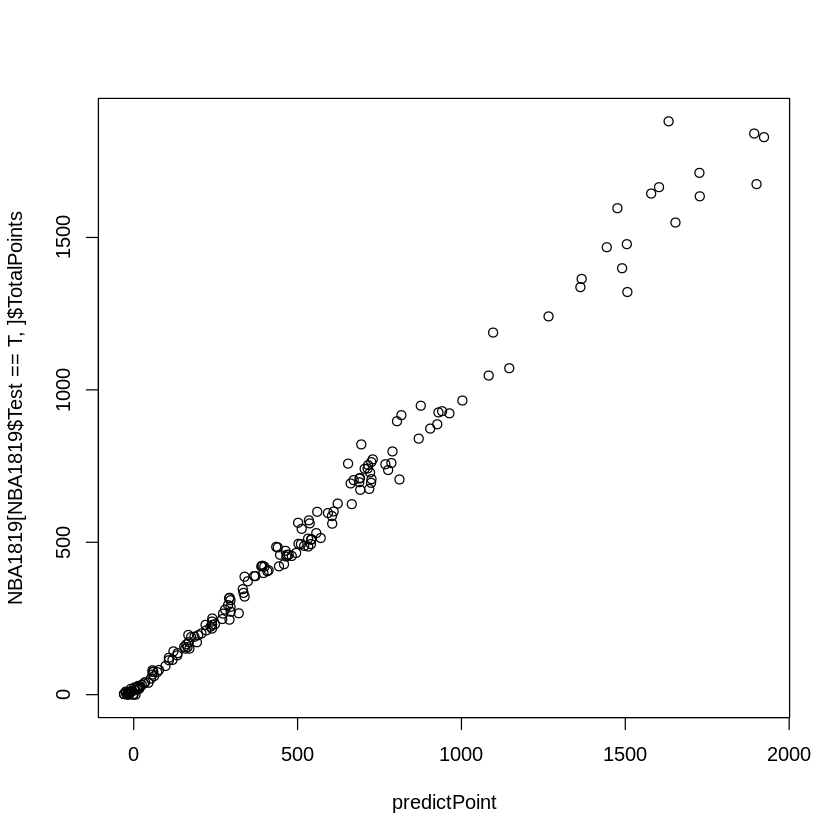

In [59]:
plot(x=predictPoint,y=NBA1819[NBA1819$Test==T,]$TotalPoints)